<a href="https://colab.research.google.com/github/RAV10K1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-22 02:33:35--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.166.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.166.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’

instacart_online_gr 100%[===================>] 196.03M  17.0MB/s    in 13s     

2020-01-22 02:33:49 (15.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# Reading in the datasets
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders_products_prior = pd.read_csv('order_products__prior.csv')
orders_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [0]:
# Concatenating order_product prior and train datasets
order_products = pd.concat([orders_products_prior, orders_products_train])

In [9]:
# Checking new orders_products dataframe 
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
# Checking Orders dataframe
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
# Checking products dataframe
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
# Merging dataframes
order_products_full = pd.merge(order_products, orders, how='inner', on='order_id')
order_products_full.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [13]:
# Merging data into final dataframe
final_data = pd.merge(order_products_full, products, how='inner', on='product_id')
final_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16


In [14]:
# Dropping unnecessary columns
data_final = final_data.drop(['eval_set', 'aisle_id', 'department_id'], axis=1)
data_final.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites
1,26,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites
2,120,33120,13,0,23750,11,6,8,10.0,Organic Egg Whites
3,327,33120,5,1,58707,21,6,9,8.0,Organic Egg Whites
4,390,33120,28,1,166654,48,0,12,9.0,Organic Egg Whites


In [15]:
# Checking value counts for each product name
data_final['product_name'].value_counts().sort_values(ascending=False)

Banana                                                          491291
Bag of Organic Bananas                                          394930
Organic Strawberries                                            275577
Organic Baby Spinach                                            251705
Organic Hass Avocado                                            220877
                                                                 ...  
Rosa Mosqueta Rose Hip Seed Oil                                      1
Vegan Coconut Milk Caramels With Sea Salt                            1
Vitamin D Gummies                                                    1
Kefir Raspberry                                                      1
Vitality Chicken Breasts with Flaxseed & Vitamins Dog Treats         1
Name: product_name, Length: 49685, dtype: int64

In [16]:
# Getting value counts of products bought
frequency_analysis = data_final['product_name'].value_counts().sort_values(ascending=False)[:10]
frequency_analysis

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [17]:
# Creating final dataframe
df = data_final['product_name'].value_counts().sort_values(ascending=False)[:10].rename_axis('Product Name').to_frame('Frequency')
df.head()

,Frequency
Product Name,
Banana,491291
Bag of Organic Bananas,394930
Organic Strawberries,275577
Organic Baby Spinach,251705
Organic Hass Avocado,220877


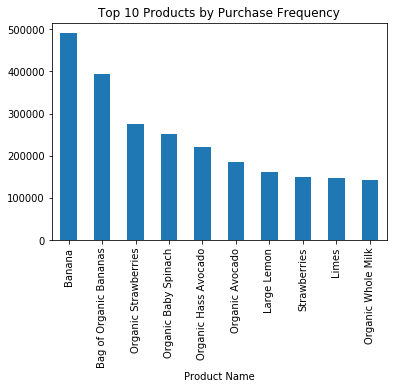

In [18]:
# Visualizing Data
df.plot(kind='bar', title='Top 10 Products by Purchase Frequency',legend=False);

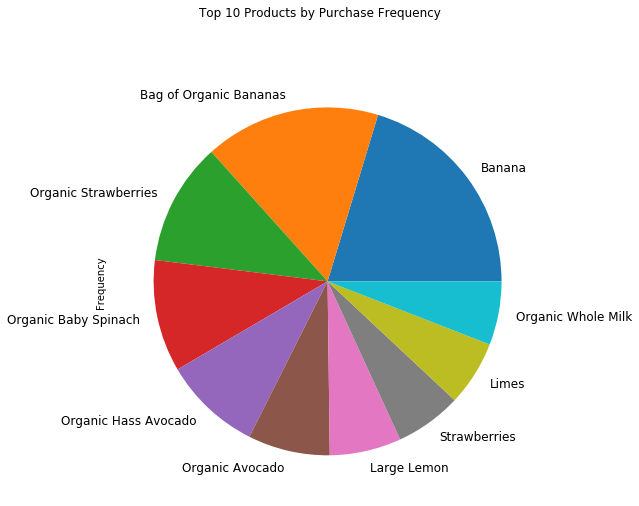

In [19]:
# Visualizing Data
df.plot(kind='pie', title='Top 10 Products by Purchase Frequency', subplots=True, legend=False, figsize = (8,8), fontsize=12);

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [20]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [21]:
# Transposing into proper format
table2 = table2.T
table2

,treatmenta,treatmentb
John Smith,NaN,2.0
Jane Doe,16.0,11.0
Mary Johnson,3.0,1.0


In [22]:
# table2 -> tidy
table2 = table2.reset_index()
table2

,index,treatmenta,treatmentb
0,John Smith,NaN,2.0
1,Jane Doe,16.0,11.0
2,Mary Johnson,3.0,1.0


In [23]:
# Applying .melt() function
tidy2 = table2.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy2

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [24]:
# Renanaming Columns
tidy2 = tidy2.rename(columns={'index':'name', 'variable':'trt', 'value':'result'})
tidy2 

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [25]:
# Cleaning treatment column
tidy2.trt = tidy2.trt.str.replace('treatment', '')
tidy2

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [26]:
# tidy -> table2
wide = tidy2.pivot_table(index='name', values='result', columns='trt')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
# Importing SNS Library
import seaborn as sns

In [0]:
# Loading Flight Data
flights = sns.load_dataset('flights')

In [29]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [30]:
# Flights Pivot Table
flt_pvt = flights.pivot_table(values='passengers', index='year', columns='month')
flt_pvt

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [31]:
##### YOUR CODE HERE #####

# Calling predefined data-set of required values
data_final.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites
1,26,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites
2,120,33120,13,0,23750,11,6,8,10.0,Organic Egg Whites
3,327,33120,5,1,58707,21,6,9,8.0,Organic Egg Whites
4,390,33120,28,1,166654,48,0,12,9.0,Organic Egg Whites


In [54]:
# Creating new dataframe
df_insta = data_final[['product_id','product_name', 'order_hour_of_day', 'order_id']].copy()
df_insta.head()

,product_id,product_name,order_hour_of_day,order_id
0,33120,Organic Egg Whites,9,2
1,33120,Organic Egg Whites,16,26
2,33120,Organic Egg Whites,8,120
3,33120,Organic Egg Whites,9,327
4,33120,Organic Egg Whites,12,390


In [56]:
# Arranging dataframe to pivot table
df_pop = df_insta.pivot_table(values=['order_hour_of_day', 'product_id' ], index=['product_name','order_id']).reset_index()
df_pop.head()

,product_name,order_id,order_hour_of_day,product_id
0,#2 Coffee Filters,10427,10,25773
1,#2 Coffee Filters,11996,13,25773
2,#2 Coffee Filters,20770,8,25773
3,#2 Coffee Filters,22531,8,25773
4,#2 Coffee Filters,23489,13,25773


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####

